**Exercícios de Aprendizado Supervisionado**

In [ ]:
#Importando bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_text

import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

**Download Dataset** - [Crop recommendation data](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/4GBWFV)

O dataset **Crop Recommendation Data** contém um total de 1697 amostras, referente as características de solo e condições ambientais para o crescimento de diversas culturas.

Os dados estão estruturados nas seguintes colunas:
N (Nitrogênio): Quantidade de nitrogênio no solo.

*   P (Fósforo): Quantidade de fósforo no solo
*   K (Potássio): Quantidade de potássio no solo
*   temperature (Temperatura): Temperatura ambiente em graus Celsius
*   humidity (Umidade): Umidade relativa do ar em porcentagem
ph: Valor de pH do solo
*   rainfall (Precipitação): Quantidade de precipitação em mm
*   label: A cultura recomendada para plantio, com base nas condições descritas


**Importante:** em *label*, temos os rótulos (classes) que representam diferentes culturas agrícolas: Rice (Arroz), Maize (Milho), Soyabeans (Soja), Beans (Feijão), Peas (Ervilhas), Groundnuts (Amendoins), Cowpeas (Feijão-caupi), Banana, Mango (Manga), Grapes (Uvas), Watermelon (Melancia), Apple (Maçã), Orange (Laranja), Cotton (Algodão) e Coffee (Café)

## Exercício 1 – Leitura Dataset

Realize a leitura dos dados e exiba as informações gerais do dataset

Exiba quantas amostras existem por classe (label)


In [ ]:
def df_summary(df):
    summary_data = []

    for col in df.columns:
        col_dtype = df[col].dtype
        num_of_nulls = df[col].isnull().sum()
        num_of_non_null = df[col].notnull().sum()
        num_of_distinct_values = df[col].nunique()
        percentage_of_nulls = (num_of_nulls/df.shape[0]) * 100
        percentage_of_nulls = f'{round(percentage_of_nulls, 4)}%'

        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col].value_counts().to_dict()
        else:
            top_10_values_counts =df[col].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key = lambda item: item[1], reverse = True)}


        summary_data.append({
            'col_name': col,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_null': num_of_non_null,
            'percentage_of_nulls':  percentage_of_nulls,
            'distinct_values_counts': distinct_values_counts
        })
        
    summary_data = pd.DataFrame(summary_data)
    return summary_data

In [26]:
#Digite seu código aqui
crop_df = pd.read_csv("../data/crop_recommendation.csv")
value_counts = crop_df['label'].value_counts()

print(f"Amostras por: {value_counts}")
summary_df = df_summary(crop_df)
display(summary_df)

Amostras por: label
rice          139
Soyabeans     130
banana        130
beans         125
cowpeas       122
orange        122
maize         119
coffee        110
peas          100
groundnuts    100
mango         100
watermelon    100
grapes        100
apple         100
cotton        100
Name: count, dtype: int64


,col_name,col_dtype,num_of_nulls,num_of_non_null,percentage_of_nulls,distinct_values_counts
0,N,int64,0,1697,0.0%,"{22: 38, 27: 34, 31: 31, 40: 30, 36: 30, 20: 2..."
1,P,int64,0,1697,0.0%,"{60: 45, 35: 37, 56: 37, 58: 37, 45: 36, 59: 3..."
2,K,int64,0,1697,0.0%,"{17: 75, 20: 71, 22: 69, 15: 68, 25: 65, 19: 6..."
3,temperature,float64,0,1697,0.0%,"{27.1994597: 2, 28.06642822: 2, 27.06909959: 2..."
4,humidity,float64,0,1697,0.0%,"{76.8532006: 2, 82.54195839: 2, 75.94067692: 2..."
5,ph,float64,0,1697,0.0%,"{6.231049028: 2, 5.988992796: 2, 7.152811172: ..."
6,rainfall,float64,0,1697,0.0%,"{92.82840911: 3, 101.0494791: 3, 104.9378: 3, ..."
7,label,object,0,1697,0.0%,"{'rice': 139, 'Soyabeans': 130, 'banana': 130,..."


In [7]:
crop_df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000
mean,52.647024,58.126105,52.031232,24.711674,65.848856,6.438962,99.364935
std,38.536964,34.164342,57.068796,4.910428,24.432640,0.870411,50.436396
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,5.314507
25%,21.000000,36.000000,19.000000,21.631491,51.278688,5.861399,66.838723
50%,37.000000,54.000000,27.000000,24.910323,77.906210,6.354007,93.123306
75%,90.000000,72.000000,52.000000,27.834871,83.856427,6.932537,115.356032
max,140.000000,145.000000,205.000000,41.948657,94.964199,9.935091,298.560117


In [8]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1697 non-null   int64  
 1   P            1697 non-null   int64  
 2   K            1697 non-null   int64  
 3   temperature  1697 non-null   float64
 4   humidity     1697 non-null   float64
 5   ph           1697 non-null   float64
 6   rainfall     1697 non-null   float64
 7   label        1697 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 106.2+ KB


## Exercício 2 – Preparação dos Dados, divisão treinamento e testes

Realize a divisão dos dados em treinamento e testes

In [53]:
#Digite seu código aqui
train_df = crop_df.copy()

X = train_df.drop(['label'], axis = 1)
y = train_df['label']

class_names = np.unique(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}\n")


X_train shape: (1357, 7)
X_test shape: (340, 7)



## Exercício 3 – Treinamento do Modelo (pode ser o K-NN ou Decision Tree)

Escolha um algoritmo da biblioteca Scikit-learn que seja adequado para treinar um modelo de recomendação de plantio a partir das variaveis presentes no conjunto de dados.

In [69]:

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [70]:
y_pred = knn_model.predict(X_test)

*Utilizando Decision Tree*

In [71]:
#Digite seu código aqui
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Exercício 4 – Avaliar o Modelo

Utilize a métrica adequada para avaliar o modelo a partir dos dados de treinamento

### utils

In [72]:
# Defining a function to evaluate the model and display metrics
def evaluate(model, conf_matrix=True, return_=False):
    # Confusion Matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Displaying the Confusion Matrix if specified
    if conf_matrix:
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            cbar=False,
            xticklabels=class_names,
            yticklabels=class_names,
        )
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()

    # Displaying the Classification Report
    print(classification_report(y_test, y_pred, target_names=class_names))

    # Calculating and displaying additional metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')



    # Displaying the summary metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")


    # Extracting the model name for display
    model_name = str(type(model).__name__)

    # Returning metrics as a dictionary if specified
    if return_:
        metrics_dict = {
            "Model": model_name,
            "accuracy": round(accuracy, 4),
            "precision": round(precision, 4),
            "recall": round(recall, 4),
            "f1": round(f1, 4)
        }
        return metrics_dict

### KNN

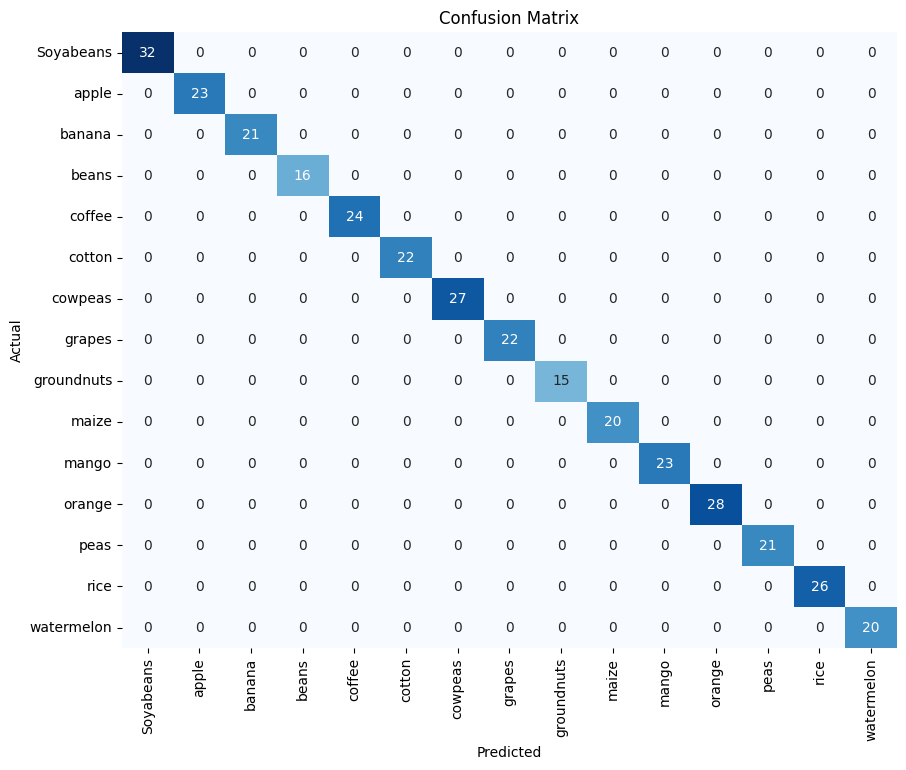

              precision    recall  f1-score   support

   Soyabeans       1.00      1.00      1.00        32
       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
       beans       1.00      1.00      1.00        16
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        22
     cowpeas       1.00      1.00      1.00        27
      grapes       1.00      1.00      1.00        22
  groundnuts       1.00      1.00      1.00        15
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        28
        peas       1.00      1.00      1.00        21
        rice       1.00      1.00      1.00        26
  watermelon       1.00      1.00      1.00        20

    accuracy                           1.00       340
   macro avg       1.00      1.00      1.00       340
weighted avg       1.00   

In [77]:
evaluate(knn_model)

### Decision Tree

In [78]:
predicted = decision_tree.predict(X_test)
accuracy = accuracy_score(predicted, y_test)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9970588235294118


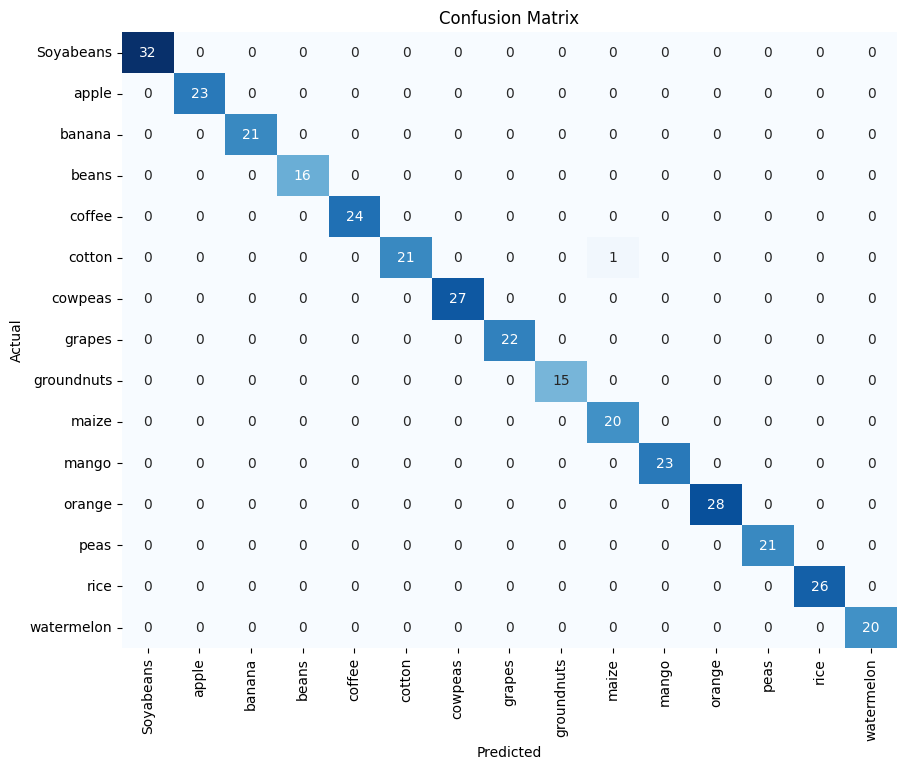

              precision    recall  f1-score   support

   Soyabeans       1.00      1.00      1.00        32
       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
       beans       1.00      1.00      1.00        16
      coffee       1.00      1.00      1.00        24
      cotton       1.00      0.95      0.98        22
     cowpeas       1.00      1.00      1.00        27
      grapes       1.00      1.00      1.00        22
  groundnuts       1.00      1.00      1.00        15
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        28
        peas       1.00      1.00      1.00        21
        rice       1.00      1.00      1.00        26
  watermelon       1.00      1.00      1.00        20

    accuracy                           1.00       340
   macro avg       1.00      1.00      1.00       340
weighted avg       1.00   

In [79]:
evaluate(decision_tree)

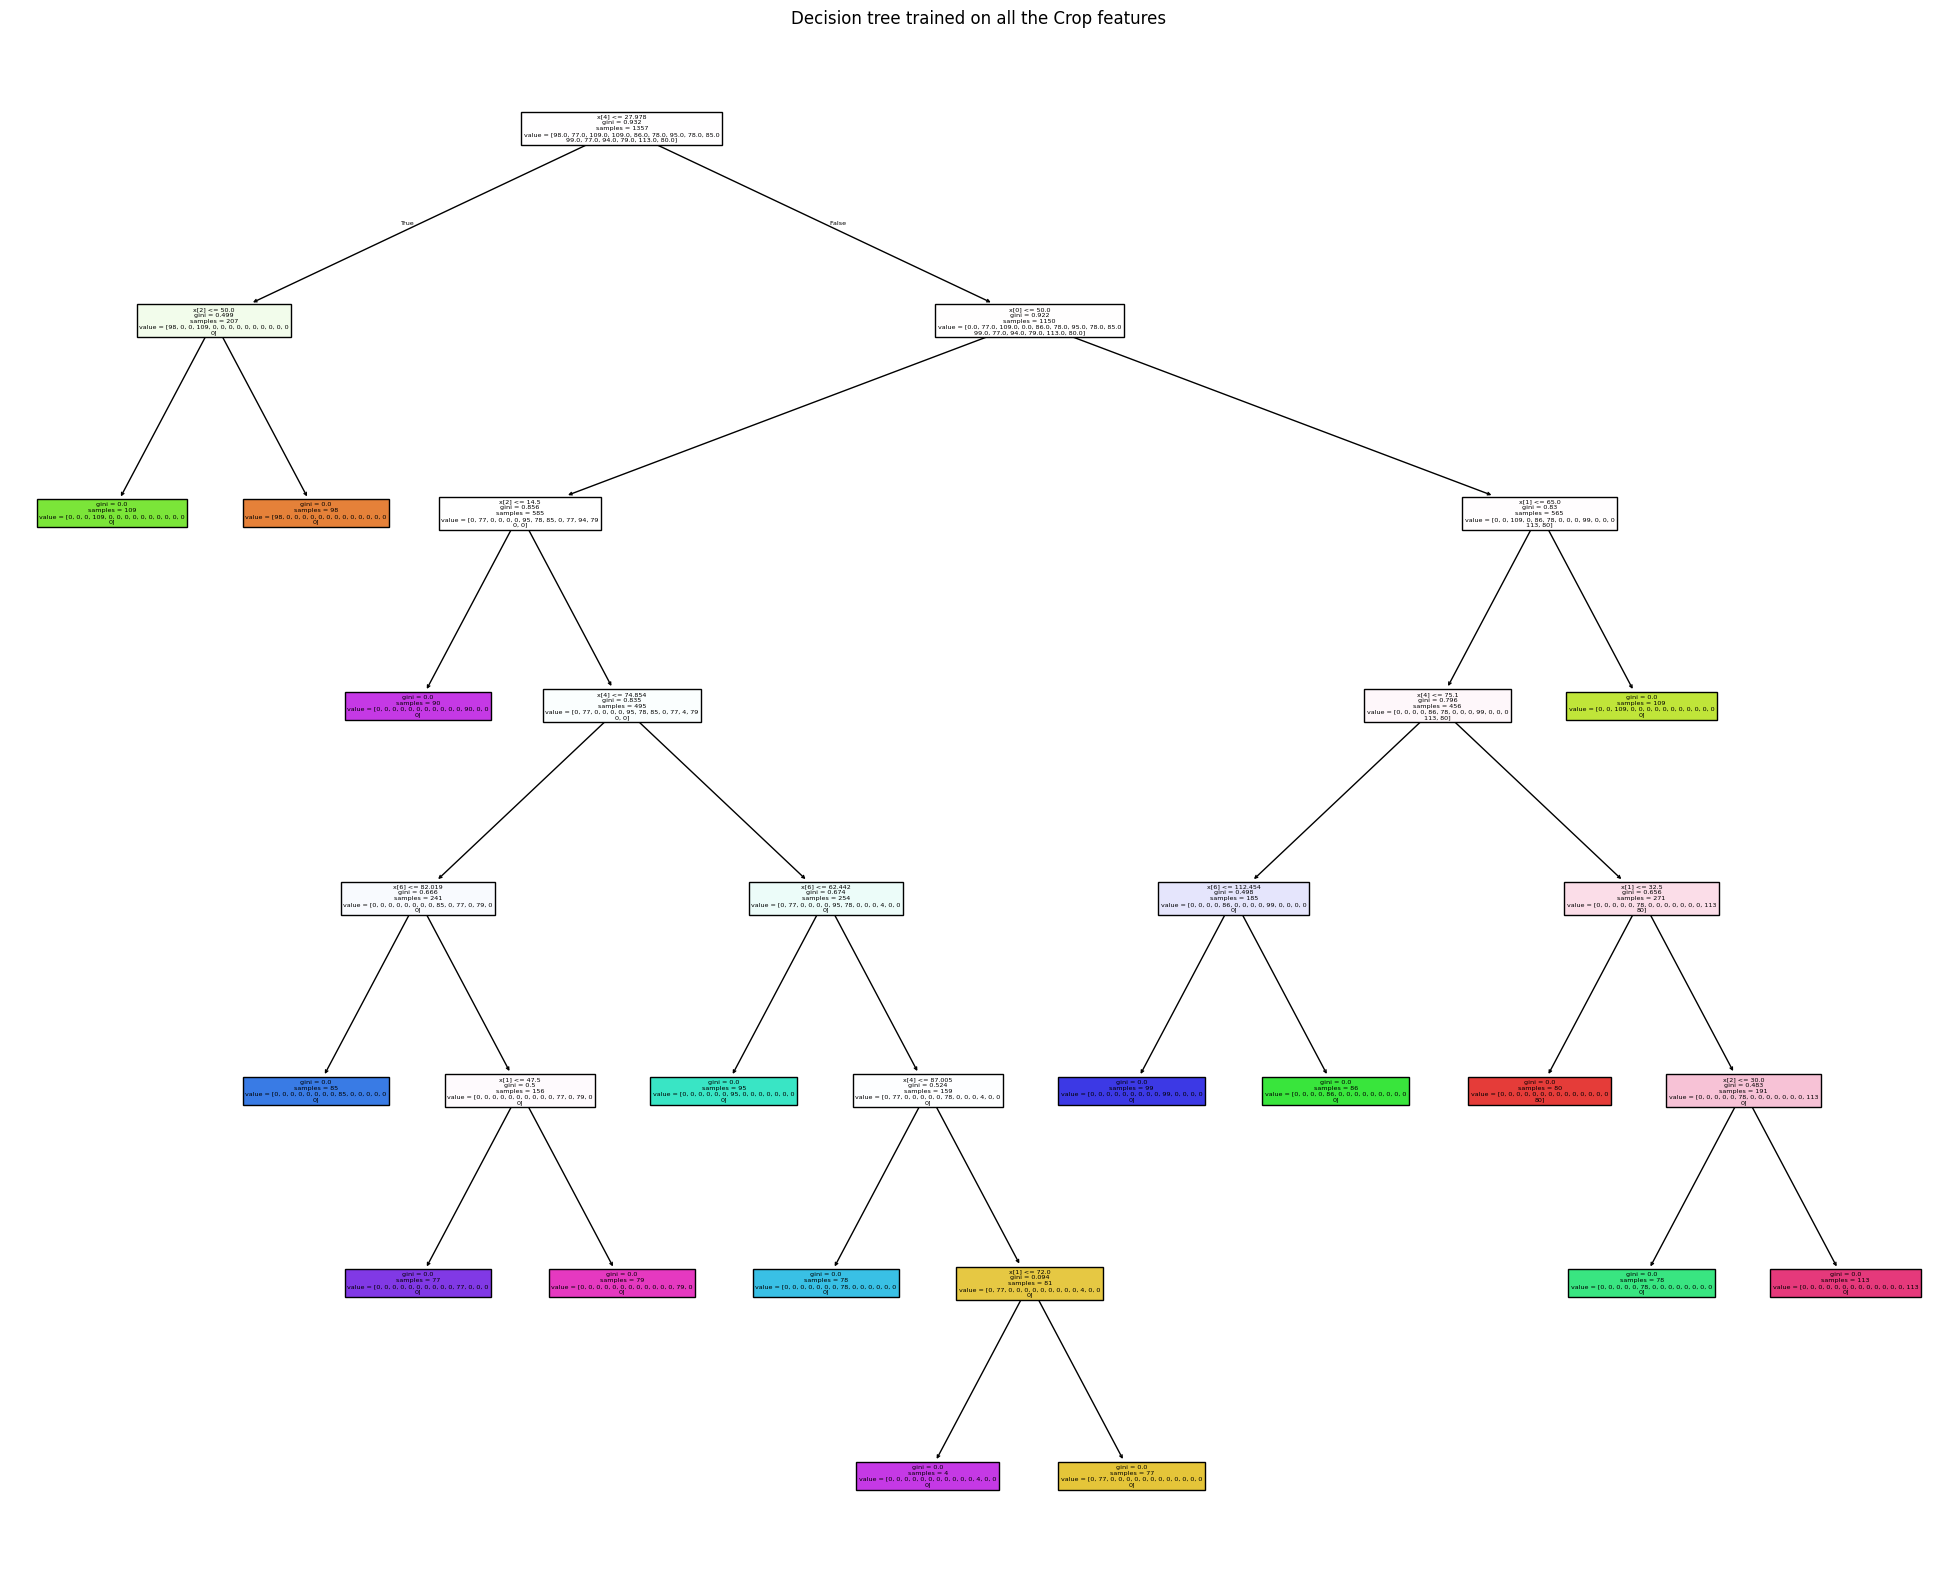

In [80]:
# Visualizar a árvore de decisão em forma de grafico
fig = plt.figure(figsize = (25, 20))
tree = plot_tree(decision_tree, filled = True)
plt.title("Decision tree trained on all the Crop features")
plt.show()

In [81]:
# Visualizar a árvore de decisão em forma de texto
decision_tree_text = export_text(decision_tree)
print(decision_tree_text)

|--- feature_4 <= 27.98
|   |--- feature_2 <= 50.00
|   |   |--- class: beans
|   |--- feature_2 >  50.00
|   |   |--- class: Soyabeans
|--- feature_4 >  27.98
|   |--- feature_0 <= 50.00
|   |   |--- feature_2 <= 14.50
|   |   |   |--- class: orange
|   |   |--- feature_2 >  14.50
|   |   |   |--- feature_4 <= 74.85
|   |   |   |   |--- feature_6 <= 82.02
|   |   |   |   |   |--- class: groundnuts
|   |   |   |   |--- feature_6 >  82.02
|   |   |   |   |   |--- feature_1 <= 47.50
|   |   |   |   |   |   |--- class: mango
|   |   |   |   |   |--- feature_1 >  47.50
|   |   |   |   |   |   |--- class: peas
|   |   |   |--- feature_4 >  74.85
|   |   |   |   |--- feature_6 <= 62.44
|   |   |   |   |   |--- class: cowpeas
|   |   |   |   |--- feature_6 >  62.44
|   |   |   |   |   |--- feature_4 <= 87.00
|   |   |   |   |   |   |--- class: grapes
|   |   |   |   |   |--- feature_4 >  87.00
|   |   |   |   |   |   |--- feature_1 <= 72.00
|   |   |   |   |   |   |   |--- class: orange
|   |